In [0]:
#Import Libraries
import numpy as np
import pandas as pd
import os

# Exploring Data

In [0]:
#Importing Data
#os.getcwd()
#os.chdir('C:/Users/DevD/AI & Machine Learning with Python/DataSets')
data = pd.read_csv("ComputerPricesData.csv")
print("Shape before deleting duplicate values" , data.shape)

data=data.drop_duplicates()
print("Shape after deleting duplicate values" , data.shape)

data.head()

Shape before deleting duplicate values (6259, 10)
Shape after deleting duplicate values (6183, 10)


,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6183 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6183 non-null   int64 
 1   speed    6183 non-null   int64 
 2   hd       6183 non-null   int64 
 3   ram      6183 non-null   int64 
 4   screen   6183 non-null   int64 
 5   cd       6183 non-null   object
 6   multi    6183 non-null   object
 7   premium  6183 non-null   object
 8   ads      6183 non-null   int64 
 9   trend    6183 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 531.4+ KB


In [0]:
data.describe(include= "all")

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183,6183,6183,6183.000000,6183.000000
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,no,no,yes,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3314,5325,5573,NaN,NaN
mean,2221.837943,52.129549,417.760796,8.305353,14.614265,NaN,NaN,NaN,220.906033,15.944364
std,582.042129,21.190655,259.458342,5.649178,0.907304,NaN,NaN,NaN,74.958628,7.903073
min,949.000000,25.000000,80.000000,2.000000,14.000000,NaN,NaN,NaN,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,NaN,NaN,NaN,162.000000,10.000000
50%,2145.000000,50.000000,340.000000,8.000000,14.000000,NaN,NaN,NaN,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,NaN,NaN,NaN,275.000000,22.000000


In [0]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42d17b3e80>]],
      dtype=object)

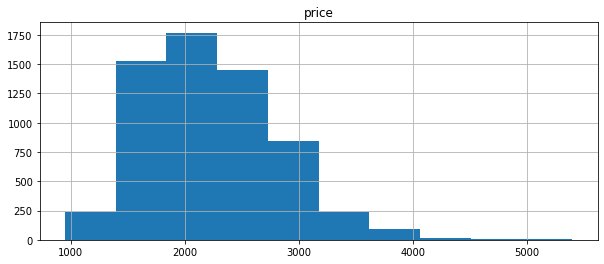

In [0]:
data.hist(['price'],figsize=(10,4))

In [0]:
data.nunique()

price      808
speed        6
hd          59
ram          6
screen       3
cd           2
multi        2
premium      2
ads         34
trend       35
dtype: int64

* price = Continuous
* speed = Categorical
* hd = Continuous
* ram = Categorical
* screen = Categorical
* cd = Categorical
* multi = Categorical
* premium = Categorical
* ads = Continuous
* trend = Continuous

In [0]:
import matplotlib.pyplot as plt

In [0]:
data.groupby('ram').size()

ram
2      390
4     2205
8     2286
16     989
24     297
32      16
dtype: int64

In [0]:
# Plotting multiple bar charts for categorical variables
def PlotBarCharts(inputData,colsToPlot):
  %matplotlib inline
  
  import matplotlib.pyplot as plt

  fig, subPlot = plt.subplots(nrows=1,ncols=len(colsToPlot), figsize=(25,5))
  fig.suptitle('Barchart of' + str(colsToPlot))

  for colName, plotNo in  zip(colsToPlot , range(len(colsToPlot))):
    inputData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNo])  


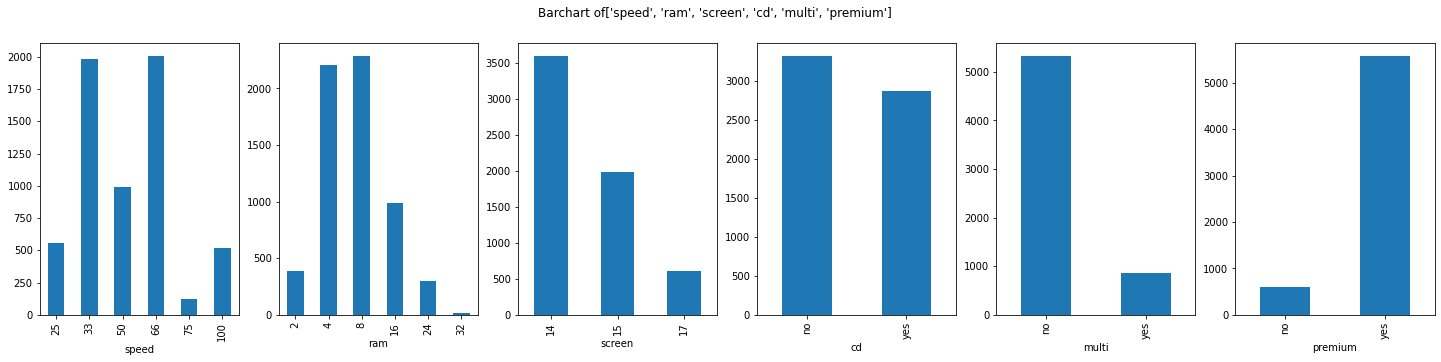

In [0]:
#Calling the function
PlotBarCharts(inputData=data, colsToPlot=['speed','ram','screen','cd','multi','premium'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42d0fb9710>,
      dtype=object)

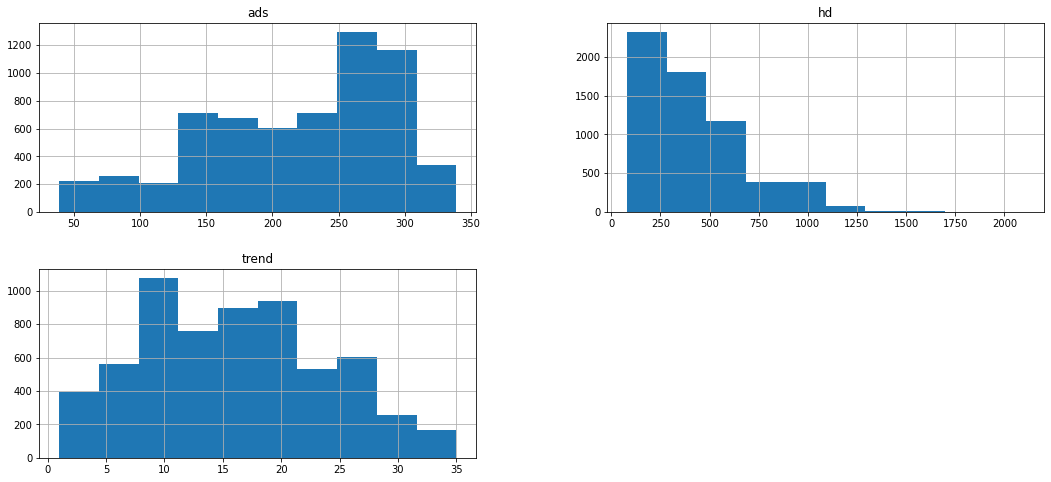

In [0]:
#Plotting histogram for numeric variables
data.hist(['hd','ads','trend'], figsize=(18,8))

##Relationship Explorer: Continuous vs Continuous

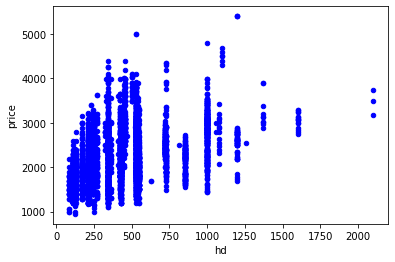

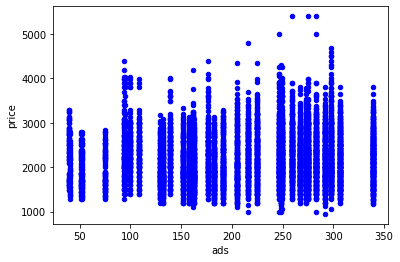

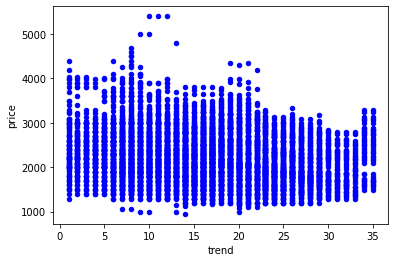

In [0]:
#Scatter Plot for Price vs hd,ads & trend
data.plot.scatter(x='hd',y='price',marker='o',color='blue')
data.plot.scatter(x='ads',y='price',marker='o',color='blue')
data.plot.scatter(x='trend',y='price',marker='o',color='blue')

In [0]:
#Correlation Matrix
CorrResult = data.corr()
CorrResult

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.298515,0.428845,0.621144,0.295094,0.056434,-0.201662
speed,0.298515,1.000000,0.370356,0.232566,0.187519,-0.214349,0.404830
hd,0.428845,0.370356,1.000000,0.777399,0.232675,-0.323342,0.577599
ram,0.621144,0.232566,0.777399,1.000000,0.208871,-0.181463,0.276938
screen,0.295094,0.187519,0.232675,0.208871,1.000000,-0.092144,0.189549
ads,0.056434,-0.214349,-0.323342,-0.181463,-0.092144,1.000000,-0.320626
trend,-0.201662,0.404830,0.577599,0.276938,0.189549,-0.320626,1.000000


##Outlier Handling
Based on the above scatter plot we can replace the price above 5000 with a nearby value like 4700

In [0]:
data['price'][data['price']>4500]=4500
data['price'].describe()
data['hd'][data['hd']>1750]=1600

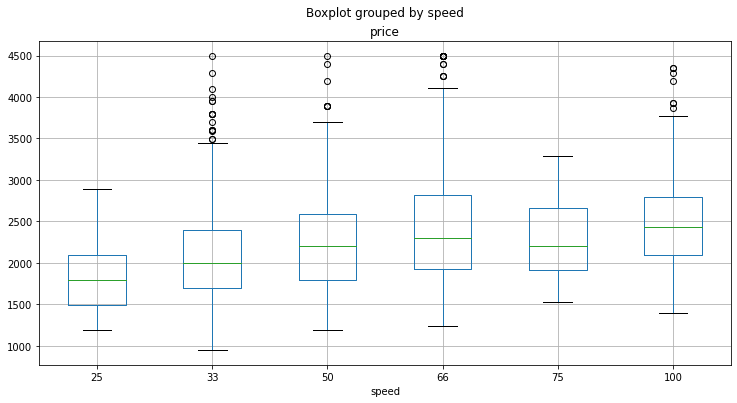

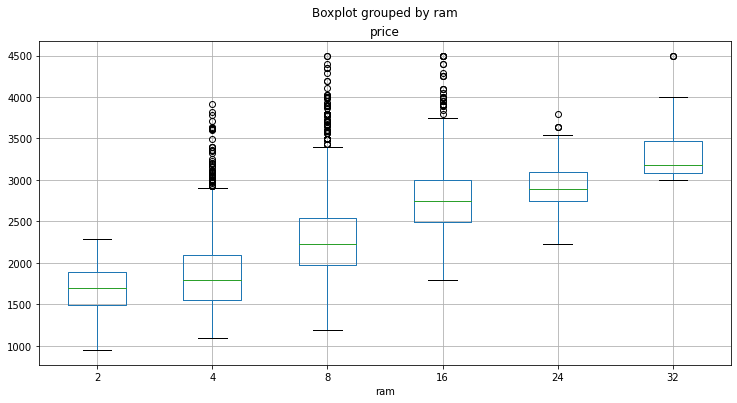

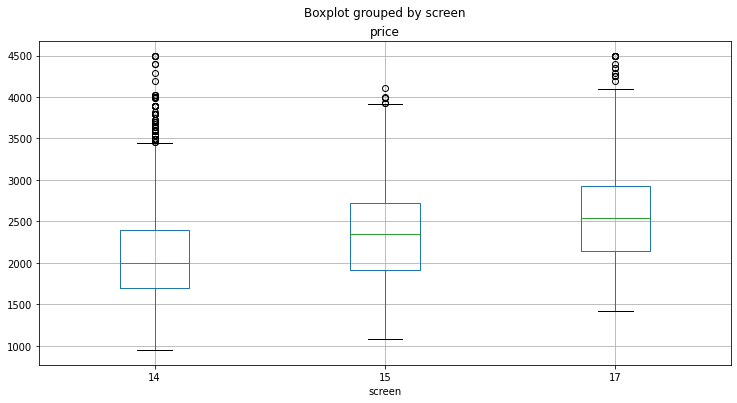

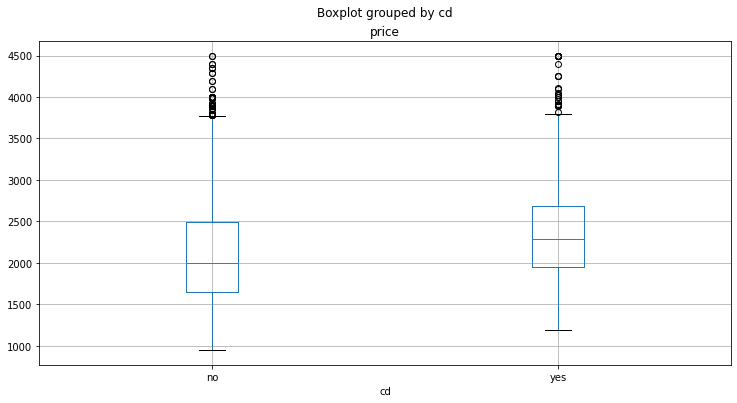

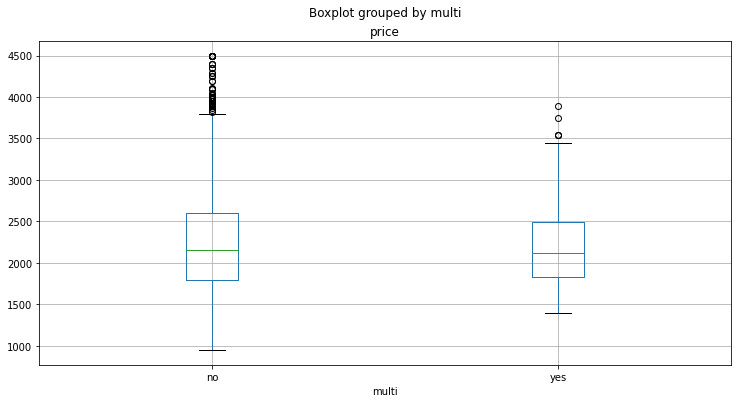

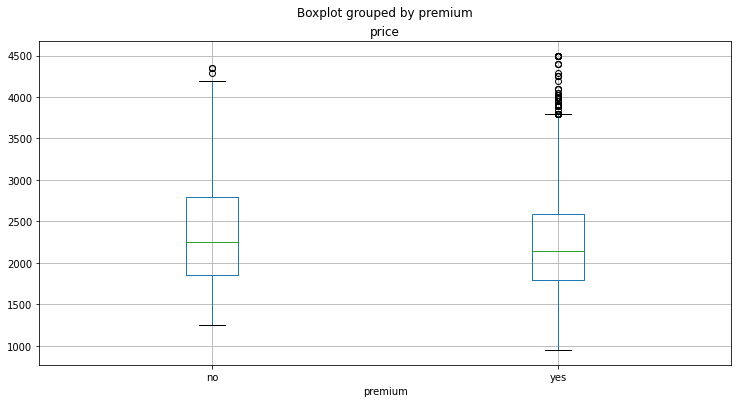

In [0]:
#Boxplot for showing distribution according to category
data.boxplot(column='price',by='speed', figsize=(12,6))
data.boxplot(column='price',by='ram', figsize=(12,6))
data.boxplot(column='price',by='screen', figsize=(12,6))
data.boxplot(column='price',by='cd', figsize=(12,6))
data.boxplot(column='price',by='multi', figsize=(12,6))
data.boxplot(column='price',by='premium', figsize=(12,6))

In [0]:
#ANOVA test to understant the dependency of price over each independent variable 

from scipy.stats import f_oneway as f1

Grouped1 = data.groupby('speed')['price'].apply(list)
aov1 = f1(*Grouped1)
print('P-Value for ANOVA with factor:"Speed" = ',aov1[1])

Grouped2 = data.groupby('hd')['price'].apply(list)
aov2 = f1(*Grouped2)
print('P-Value for ANOVA with factor:"hd" = ',aov2[1])

Grouped3 = data.groupby('ram')['price'].apply(list)
aov3 = f1(*Grouped3)
print('P-Value for ANOVA with factor:"RAM" = ',aov3[1])

Grouped4 = data.groupby('screen')['price'].apply(list)
aov4 = f1(*Grouped4)
print('P-Value for ANOVA with factor:"screen" = ',aov4[1])

Grouped5 = data.groupby('cd')['price'].apply(list)
aov5 = f1(*Grouped5)
print('P-Value for ANOVA with factor:"cd" = ',aov5[1])

Grouped6 = data.groupby('multi')['price'].apply(list)
aov6 = f1(*Grouped6)
print('P-Value for ANOVA with factor:"multi" = ',aov6[1])

Grouped7 = data.groupby('premium')['price'].apply(list)
aov7 = f1(*Grouped7)
print('P-Value for ANOVA with factor:"premium" = ',aov7[1])

Grouped8 = data.groupby('ads')['price'].apply(list)
aov8 = f1(*Grouped8)
print('P-Value for ANOVA with factor:"ads" = ',aov8[1])

Grouped9 = data.groupby('trend')['price'].apply(list)
aov9 = f1(*Grouped9)
print('P-Value for ANOVA with factor:"trend" = ',aov9[1])

P-Value for ANOVA with factor:"Speed" =  4.0314113996375534e-154
P-Value for ANOVA with factor:"hd" =  0.0
P-Value for ANOVA with factor:"RAM" =  0.0
P-Value for ANOVA with factor:"screen" =  6.239144520753893e-129
P-Value for ANOVA with factor:"cd" =  7.511877543978495e-55
P-Value for ANOVA with factor:"multi" =  0.2013720291575054
P-Value for ANOVA with factor:"premium" =  1.8261248775329353e-10
P-Value for ANOVA with factor:"ads" =  3.04995268851763e-57
P-Value for ANOVA with factor:"trend" =  1.0357885345935023e-56


In [0]:
#Checking Missing Value
data.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64

In [0]:
# Filtering only those columns where absolute correlation > 0.5 with Price
CorrResult['price'][abs(CorrResult['price']) > 0.5 ]

price    1.000000
ram      0.621144
Name: price, dtype: float64

In [0]:
dataNum = pd.get_dummies(data)
dataNum.head()

,price,speed,hd,ram,screen,ads,trend,cd_no,cd_yes,multi_no,multi_yes,premium_no,premium_yes
0,1499,25,80,4,14,94,1,1,0,1,0,0,1
1,1795,33,85,2,14,94,1,1,0,1,0,0,1
2,1595,25,170,4,15,94,1,1,0,1,0,0,1
3,1849,25,170,8,14,94,1,1,0,1,0,1,0
4,3295,33,340,16,14,94,1,1,0,1,0,0,1


In [0]:
#Save the data in plckle format
dataNum.to_pickle('ComputerPriceDataNumeric.pkl')

In [0]:
dataNum.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'ads', 'trend', 'cd_no',
       'cd_yes', 'multi_no', 'multi_yes', 'premium_no', 'premium_yes'],
      dtype='object')

### Data Partitioning for fitting SLR models

In [0]:
#Picking up target and predictor variable
Target = 'price'
predictor = ['ram']
X = dataNum[predictor].values
y = dataNum[Target].values

#Partition data
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 2020)

#Check the shapes of samples
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4328, 1)
(4328,)
(1855, 1)
(1855,)


## **Machine Learning: Fitting Multiple Algorithms on data**

### **1. Simple Linear Regression**

In [0]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

#Creating the model for training data
model = LR.fit(X_train,y_train)
pred = model.predict(X_test)

#Regression Equation
a = model.intercept_
b = model.coef_
print('The regression equation is:','price = ',a,'+ ram x',b[0])


#Goodness of fit of model
from sklearn import metrics
print('Value of R-Square = ',metrics.r2_score(y_train,model.predict(X_train)))

#Accuracy of the test data
print('Accrracy of test data = ',round(100-(np.mean(np.abs((y_test-pred)/y_test)) * 100),2),'%')

The regression equation is: price =  1693.6389597718107 + ram x 64.0252302376182
Value of R-Square =  0.38662590150105225
Accrracy of test data =  83.7 %


In [0]:
#Sample Output
Result = pd.DataFrame(data=X_test, columns=predictor)
Result[Target]=y_test
Result['Predicted'+Target] = np.round(pred)
Result['Deviance'] = np.round(y_test-pred)
Result.head(10)

,ram,price,Predictedprice,Deviance
0,4,1599,1950.0,-351.0
1,8,2035,2206.0,-171.0
2,16,2744,2718.0,26.0
3,8,1999,2206.0,-207.0
4,4,1724,1950.0,-226.0
5,16,3190,2718.0,472.0
6,4,1690,1950.0,-260.0
7,4,1798,1950.0,-152.0
8,4,1499,1950.0,-451.0
9,4,1795,1950.0,-155.0


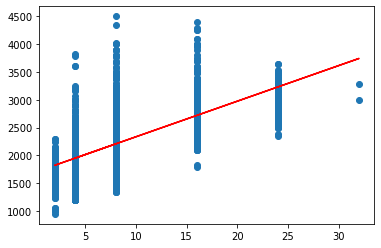

In [0]:
#Final Visualisation
plt.scatter(x = Result['ram'], y = Result['price'])
plt.plot(Result['ram'], Result['Predictedprice'], color = 'red')

## Data Partition on Muliple columns

In [0]:
#Seperate Target Variable & Predictor Variables
Target = 'price'
Predictors = ['speed', 'hd', 'ram', 'screen', 'ads', 'trend',
       'cd_yes', 'multi_yes', 'premium_no', 'premium_yes']

X = dataNum[Predictors].values
y = dataNum[Target].values

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state = 2020 )

#Check the shapes of samples
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4328, 10)
(4328,)
(1855, 10)
(1855,)


# Multiple Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

#Creating the model for training data
model = LR.fit(X_train,y_train)
pred = model.predict(X_test)

#Regression Equation
print(model.intercept_)
print(model.coef_)

#Goodness of fit of model
from sklearn import metrics
print('Value of R-Square = ',metrics.r2_score(y_train,model.predict(X_train)))

#Accuracy of the test data
print('Accrracy of test data = ',round(100-(np.mean(np.abs((y_test-pred)/y_test)) * 100),2),'%')

48.3623208986005
[   9.24079857    0.81968651   46.83753126  123.51973453    0.65974934
  -51.43550305   58.72359088  102.42742286  263.23745342 -263.23745342]
Value of R-Square =  0.7803436478137384
Accrracy of test data =  90.22 %


In [0]:
#Sample Output
Result = pd.DataFrame(data=X_test, columns=Predictors)
Result[Target]=y_test
Result['Predicted'+Target] = np.round(pred)
Result['APE'] = np.abs((y_test-pred)/y_test) * 100
Result.sort_values(by = 'APE',ascending=False).head(10)

,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_no,premium_yes,price,Predictedprice,APE
245,33,80,2,14,249,7,0,0,0,1,1049,1783.0,69.954867
629,33,80,2,14,298,8,0,0,0,1,1049,1764.0,68.133343
1705,33,80,2,14,246,9,0,0,0,1,999,1678.0,67.965595
81,25,120,4,14,298,8,0,0,1,0,1449,2343.0,61.679076
1309,33,125,2,14,292,14,0,0,0,1,949,1488.0,56.800121
1748,25,120,4,14,339,17,0,0,1,0,1259,1907.0,51.458300
618,25,120,4,14,259,11,0,0,1,0,1449,2163.0,49.254180
1500,33,125,2,14,216,13,0,0,0,1,999,1489.0,49.081852
1485,25,120,4,14,249,7,0,0,1,0,1599,2362.0,47.707166
236,25,170,4,14,249,7,0,0,0,1,1295,1876.0,44.891661


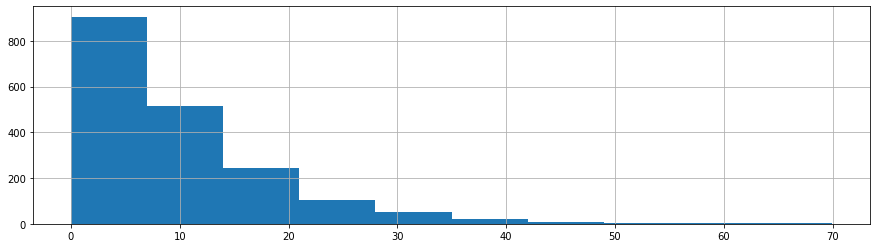

In [0]:
#Visualise error distribution
Result['APE'].hist(figsize = (15,4))

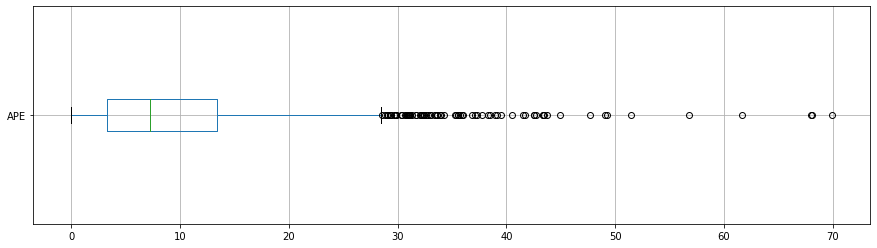

In [0]:
Result.boxplot(column='APE', figsize=(15,4), vert=False)

### Using statmodels library with OLS method

In [0]:
import statsmodels.api as sm

#Adding intercept term to model
X_train1 = sm.add_constant(X_train)
X_test1 = sm.add_constant(X_test)

RegModel = sm.OLS(y_train, X_train1).fit()
print(RegModel.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1704.
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        14:06:09   Log-Likelihood:                -30420.
No. Observations:                4328   AIC:                         6.086e+04
Df Residuals:                    4318   BIC:                         6.092e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.2415     47.318      0.681      0.4

## Decision Tree Regression

In [0]:
#Seperate Target Variable & Predictor Variables
Target = 'price'
Predictors = ['speed', 'hd', 'ram', 'screen', 'ads', 'trend', 'cd_no',
       'cd_yes', 'multi_no', 'multi_yes', 'premium_no', 'premium_yes']

X = dataNum[Predictors].values
y = dataNum[Target].values

from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state = 100 )

#Check the shapes of samples
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4328, 12)
(4328,)
(1855, 12)
(1855,)


In [0]:
# Fitting Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
DTReg = DecisionTreeRegressor(max_depth=3, criterion='mse')

DTModel = DTReg.fit(X_train, y_train)
pred = DTReg.predict(X_test)

rSq = DTReg.score(X_train, y_train)
print("R Square value is: ",rSq)

MAPE = np.mean(np.abs((y_test-pred)/y_test) ) * 100
print('Accuracy is :', (100 - MAPE), '%')

R Square value is:  0.5687047665661045
Accuracy is : 86.62797265555432 %


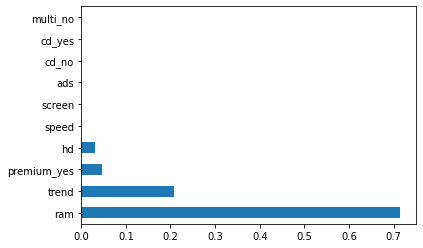

In [0]:
# Feature by Importance
VarImp = pd.Series(DTModel.feature_importances_ , index = Predictors)
VarImp.nlargest(10).plot(kind = 'barh')
#print(VarImp)

In [0]:
#Sample Output
Result = pd.DataFrame(data=X_test, columns=Predictors)
Result[Target]=y_test
Result['Predicted'+Target] = np.round(pred)
Result['APE'] = np.abs((y_test-pred)/y_test) * 100
Result.sort_values(by = 'APE',ascending=False).head(10)  #put ascending=False to show the highest APE

,speed,hd,ram,screen,ads,trend,cd_no,cd_yes,multi_no,multi_yes,premium_no,premium_yes,price,Predictedprice,APE
810,33,80,2,14,246,9,1,0,1,0,0,1,999,1928.0,92.986934
645,33,270,4,14,162,22,1,0,1,0,1,0,1349,2546.0,88.714346
119,33,270,4,14,191,23,1,0,1,0,1,0,1349,2546.0,88.714346
1096,25,340,8,14,307,16,1,0,1,0,0,1,1395,2525.0,81.015611
1060,25,340,8,14,339,17,1,0,1,0,0,1,1395,2525.0,81.015611
891,25,100,4,14,248,20,1,0,1,0,1,0,1249,1958.0,56.804487
67,50,540,8,14,152,26,0,1,1,0,0,1,1299,2003.0,54.206579
1426,66,365,8,15,52,31,1,0,1,0,0,1,1299,2003.0,54.206579
245,100,728,8,17,248,20,1,0,1,0,1,0,4292,2003.0,53.328437
1008,25,212,4,14,259,11,1,0,1,0,0,1,1275,1928.0,51.210939


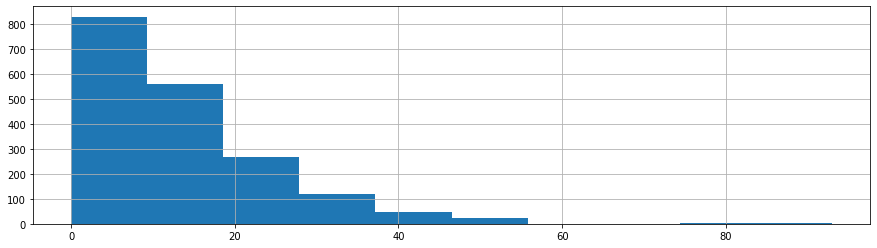

In [0]:
#Visualise error distribution
Result['APE'].hist(figsize = (15,4))

## Plotting a Decision Tree

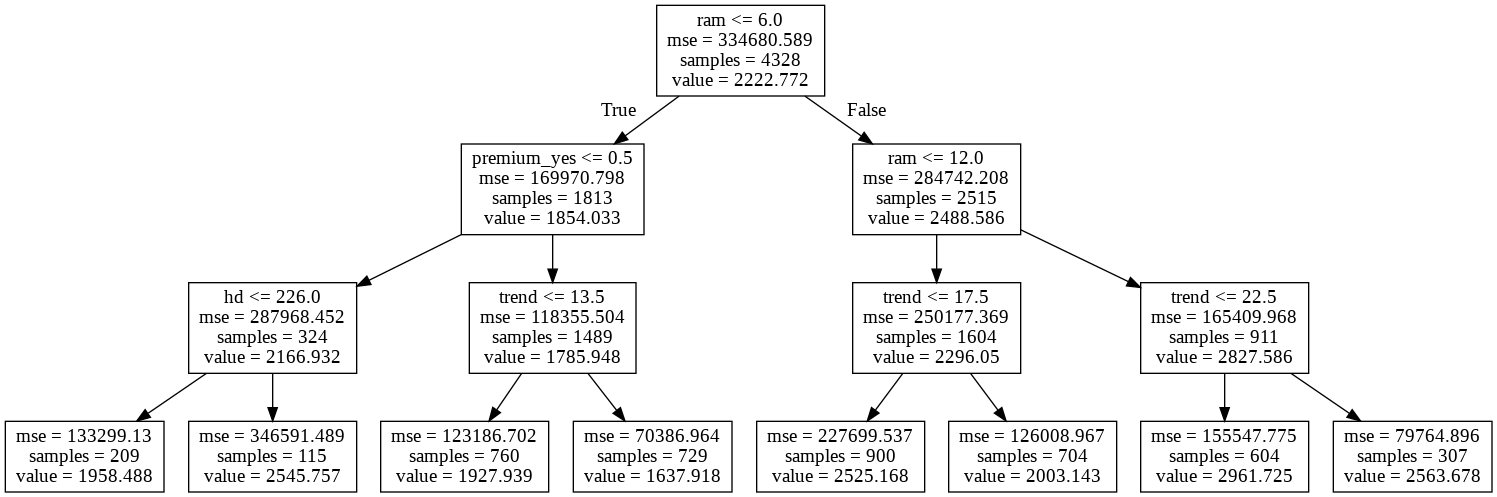

In [0]:
#Load Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create a DOT Data

dotData = tree.export_graphviz(DTModel, out_file=None, feature_names=Predictors , class_names=Target)

#Draw Graph
Dtree_graph = pydotplus.graph_from_dot_data(dotData)

#Show Graph
Image(Dtree_graph.create_png())

## Random Forest Regression

In [0]:
# Fitting Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(max_depth = 4, n_estimators = 500, criterion = 'mse')

RFModel = RFReg.fit(X_train, y_train)
pred = RFReg.predict(X_test)

rSq = RFReg.score(X_train, y_train)
print("R Square value is: ",rSq)

MAPE = np.mean(np.abs((y_test-pred)/y_test) ) * 100
print('Accuracy is :', (100 - MAPE), '%')

R Square value is:  0.7071654689462922
Accuracy is : 88.6599645715233 %


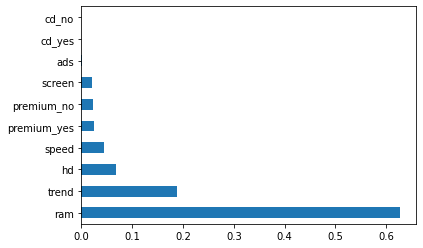

In [0]:
# Feature by Importance
VarImp = pd.Series(RFModel.feature_importances_ , index = Predictors)
VarImp.nlargest(10).plot(kind = 'barh')
#print(VarImp)

In [0]:
#Sample Output
Result = pd.DataFrame(data=X_test, columns=Predictors)
Result[Target]=y_test
Result['Predicted'+Target] = np.round(pred)
Result['APE'] = np.abs((y_test-pred)/y_test) * 100
Result.sort_values(by = 'APE',ascending=False).head(10)  #put ascending=False to show the highest APE

,speed,hd,ram,screen,ads,trend,cd_no,cd_yes,multi_no,multi_yes,premium_no,premium_yes,price,Predictedprice,APE
810,33,80,2,14,246,9,1,0,1,0,0,1,999,1836.0,83.833348
1096,25,340,8,14,307,16,1,0,1,0,0,1,1395,2371.0,69.995100
1060,25,340,8,14,339,17,1,0,1,0,0,1,1395,2371.0,69.995100
645,33,270,4,14,162,22,1,0,1,0,1,0,1349,2184.0,61.881251
119,33,270,4,14,191,23,1,0,1,0,1,0,1349,2178.0,61.476330
891,25,100,4,14,248,20,1,0,1,0,1,0,1249,1888.0,51.148338
1576,25,528,8,14,339,17,0,1,1,0,0,1,1890,2835.0,50.003952
67,50,540,8,14,152,26,0,1,1,0,0,1,1299,1915.0,47.411272
1426,66,365,8,15,52,31,1,0,1,0,0,1,1299,1909.0,46.982138
1689,33,340,4,14,205,21,1,0,1,0,0,1,1099,1591.0,44.747057


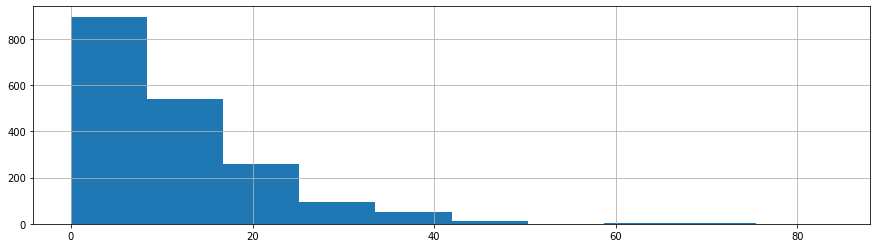

In [0]:
#Visualise error distribution
Result['APE'].hist(figsize = (15,4))

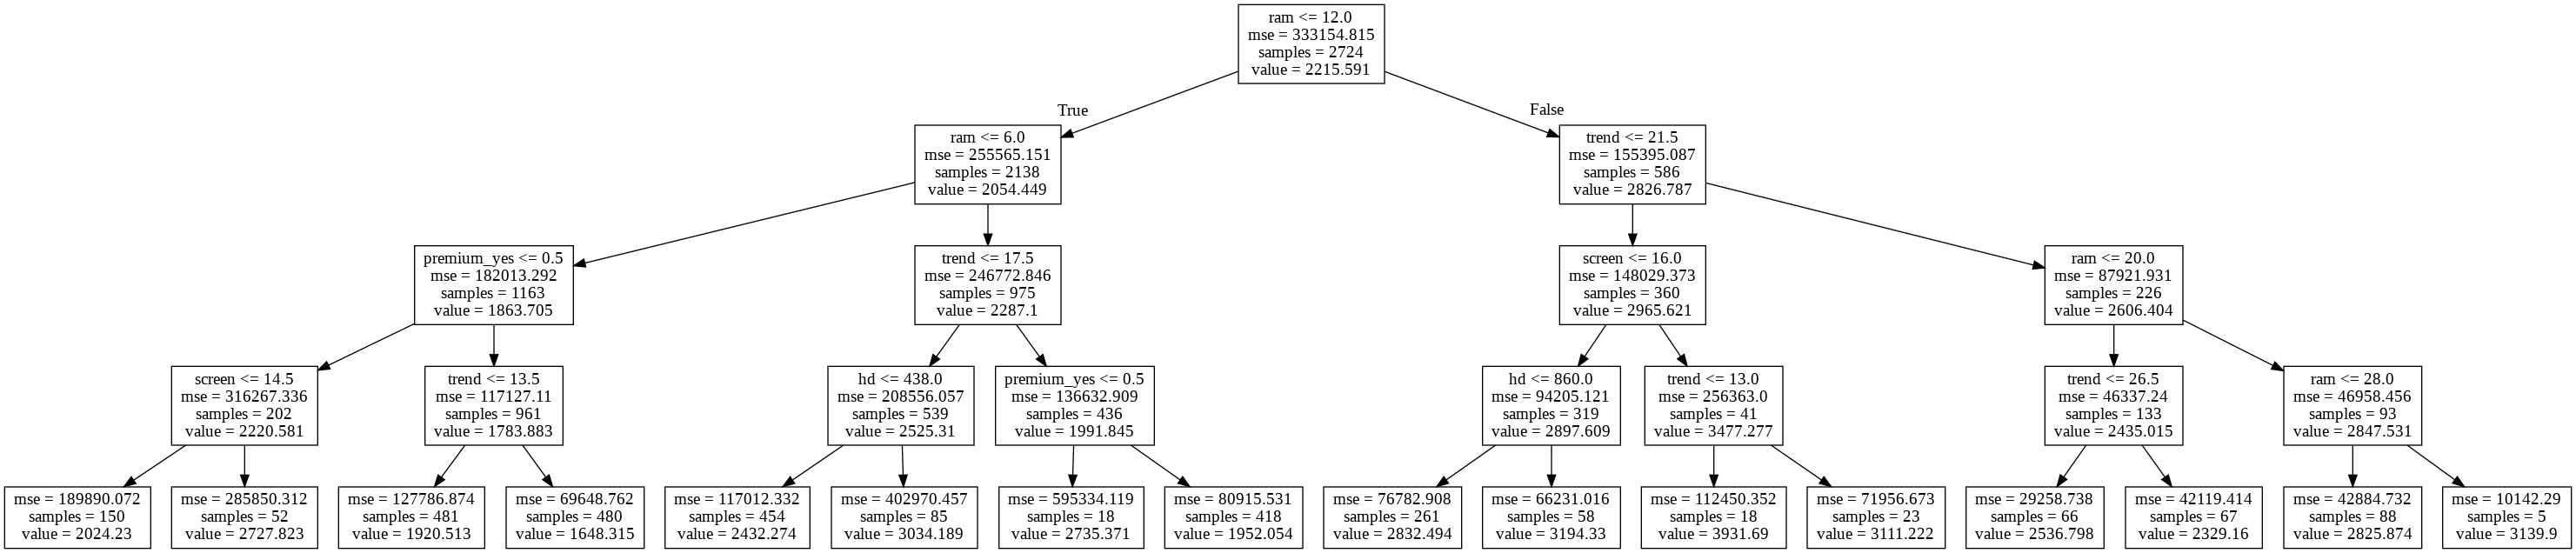

In [0]:
#Load Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create a DOT Data

dotData = tree.export_graphviz(RFModel.estimators_[10], out_file=None, feature_names=Predictors , class_names=Target)

#Draw Graph
RFtree_graph = pydotplus.graph_from_dot_data(dotData)

#Show Graph
Image(RFtree_graph.create_png())

## AdaBoost Regression

In [0]:
# Fitting AdaBoost Regressor Model(Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=4)
ABReg = AdaBoostRegressor(n_estimators=500, base_estimator=DTR, learning_rate=0.1)

ABModel = ABReg.fit(X_train, y_train)
pred = ABReg.predict(X_test)

rSq = ABReg.score(X_train, y_train)
print("R Square value is: ",rSq)

MAPE = np.mean(np.abs((y_test-pred)/y_test) ) * 100
print('Accuracy is :', (100 - MAPE), '%')

R Square value is:  0.8213533372758197
Accuracy is : 89.695986025314 %


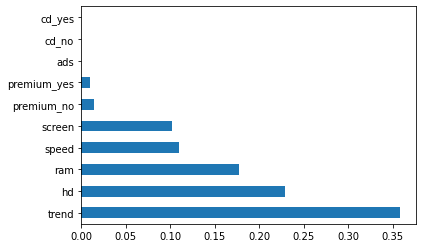

In [0]:
# Feature by Importance
VarImp = pd.Series(ABModel.feature_importances_ , index = Predictors)
VarImp.nlargest(10).plot(kind = 'barh')
#print(VarImp)

In [0]:
#Sample Output
Result = pd.DataFrame(data=X_test, columns=Predictors)
Result[Target]=y_test
Result['Predicted'+Target] = np.round(pred)
Result['APE'] = np.abs((y_test-pred)/y_test) * 100
Result.sort_values(by = 'APE',ascending=False).head(10)  #put ascending=False to show the highest APE

,speed,hd,ram,screen,ads,trend,cd_no,cd_yes,multi_no,multi_yes,premium_no,premium_yes,price,Predictedprice,APE
810,33,80,2,14,246,9,1,0,1,0,0,1,999,1634.0,63.543705
67,50,540,8,14,152,26,0,1,1,0,0,1,1299,1932.0,48.695212
1689,33,340,4,14,205,21,1,0,1,0,0,1,1099,1631.0,48.420887
844,33,340,4,14,162,22,1,0,1,0,0,1,1099,1631.0,48.420887
1096,25,340,8,14,307,16,1,0,1,0,0,1,1395,2028.0,45.385822
1060,25,340,8,14,339,17,1,0,1,0,0,1,1395,2025.0,45.176743
1426,66,365,8,15,52,31,1,0,1,0,0,1,1299,1885.0,45.088694
1408,33,80,2,14,94,1,1,0,1,0,0,1,1290,1836.0,42.329363
1099,33,428,4,15,162,22,1,0,1,0,0,1,1199,1705.0,42.224597
1301,33,340,4,14,248,20,1,0,1,0,0,1,1149,1632.0,41.993955


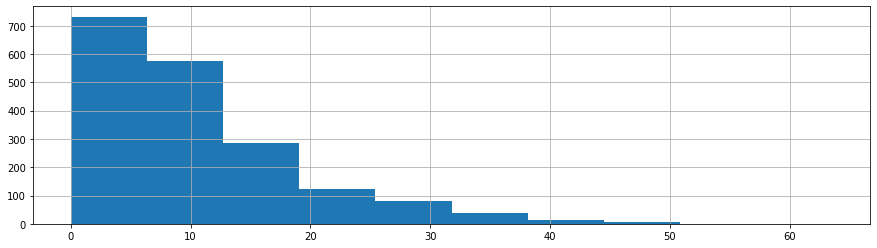

In [0]:
#Visualise error distribution
Result['APE'].hist(figsize = (15,4))

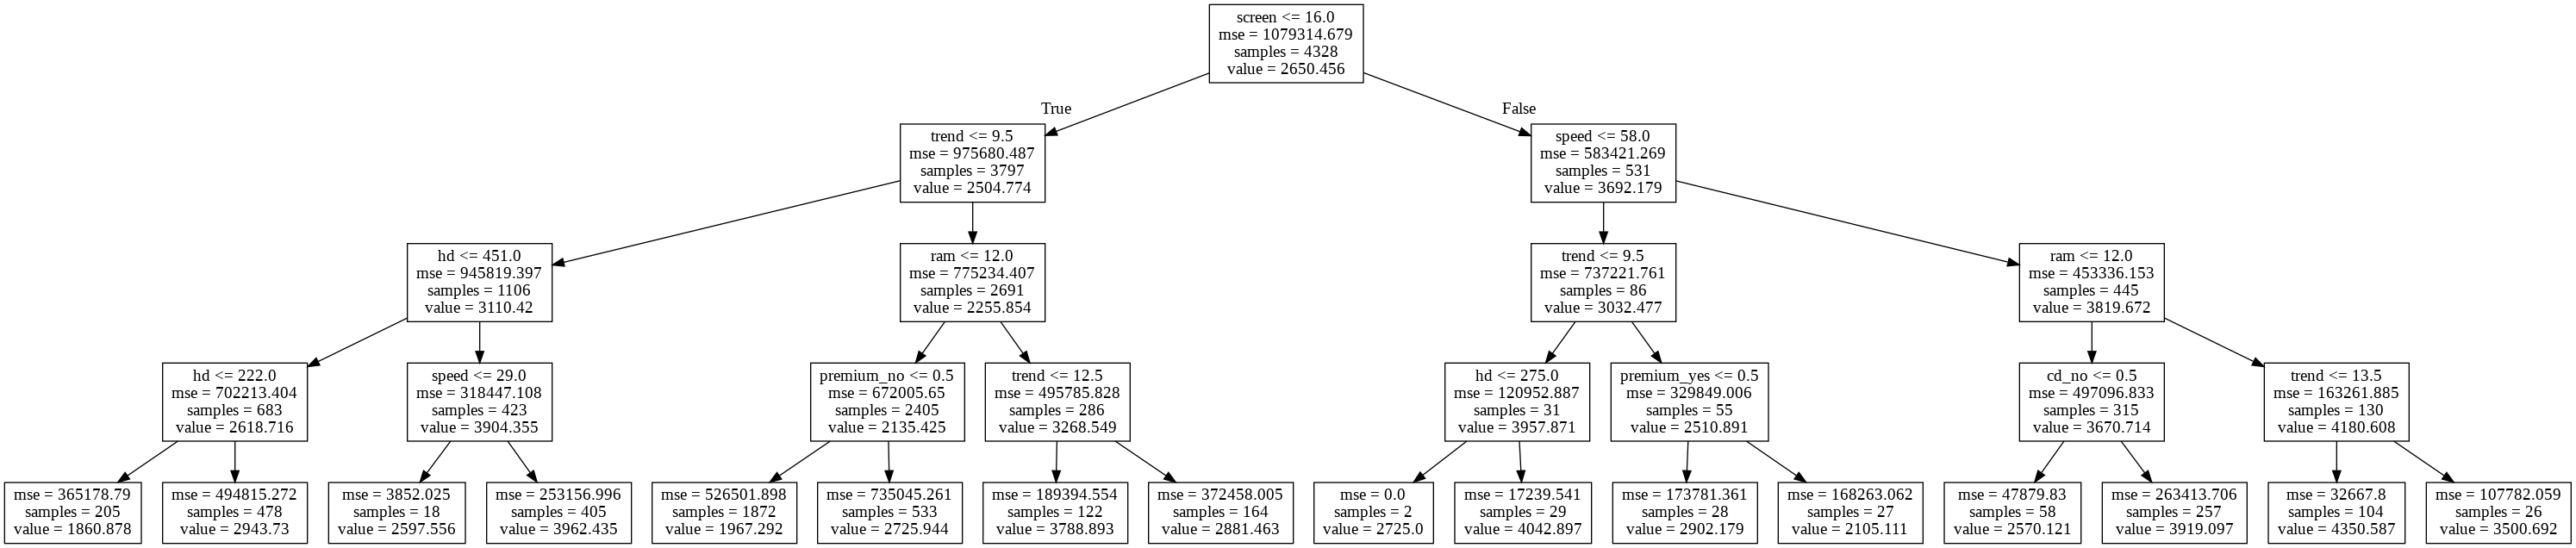

In [0]:
#Load Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create a DOT Data

dotData = tree.export_graphviz(ABModel.estimators_[490], out_file=None, feature_names=Predictors , class_names=Target)

#Draw Graph
RFtree_graph = pydotplus.graph_from_dot_data(dotData)

#Show Graph
Image(RFtree_graph.create_png())

## XGBoost Regression

In [0]:
# Fitting Random Forest Regressor Model
from xgboost import XGBRegressor
XGBReg = XGBRegressor(max_depth = 2, learning_rate=0.1, n_estimators = 1000, objective='reg:linear', booster='gbtree')

XGBModel = XGBReg.fit(X_train, y_train)
pred = XGBReg.predict(X_test)

rSq = XGBReg.score(X_train, y_train)
print("R Square value is: ",rSq)

MAPE = np.mean(np.abs((y_test-pred)/y_test) ) * 100
print('Accuracy is :', (100 - MAPE), '%')

[14:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R Square value is:  0.9302009146982924
Accuracy is : 94.15082176160352 %


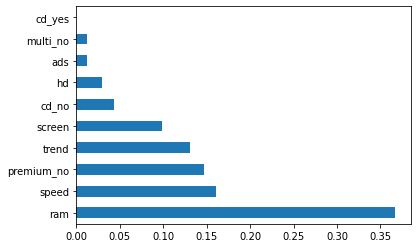

In [0]:
# Feature by Importance
VarImp = pd.Series(XGBModel.feature_importances_ , index = Predictors)
VarImp.nlargest(10).plot(kind = 'barh')
#print(VarImp)

In [0]:
#Sample Output
Result = pd.DataFrame(data=X_test, columns=Predictors)
Result[Target]=y_test
Result['Predicted'+Target] = np.round(pred)
Result['APE'] = np.abs((y_test-pred)/y_test) * 100
Result.sort_values(by = 'APE',ascending=False).head(10)  #put ascending=True to show the lowest APE

,speed,hd,ram,screen,ads,trend,cd_no,cd_yes,multi_no,multi_yes,premium_no,premium_yes,price,Predictedprice,APE
645,33,270,4,14,162,22,1,0,1,0,1,0,1349,1933.0,43.277753
1023,50,1000,24,17,162,22,0,1,1,0,0,1,2390,3263.0,36.531426
544,33,340,4,15,283,10,1,0,1,0,0,1,2749,1813.0,34.036747
119,33,270,4,14,191,23,1,0,1,0,1,0,1349,1805.0,33.814300
67,50,540,8,14,152,26,0,1,1,0,0,1,1299,1721.0,32.502222
1524,33,214,4,14,275,12,1,0,1,0,0,1,1395,1835.0,31.523096
1546,33,214,8,14,298,8,1,0,1,0,0,1,1795,2273.0,26.634178
20,66,525,8,17,283,10,0,1,1,0,0,1,4500,3311.0,26.413281
1408,33,80,2,14,94,1,1,0,1,0,0,1,1290,1626.0,26.034115
591,25,214,4,14,267,15,1,0,1,0,0,1,1195,1501.0,25.627584


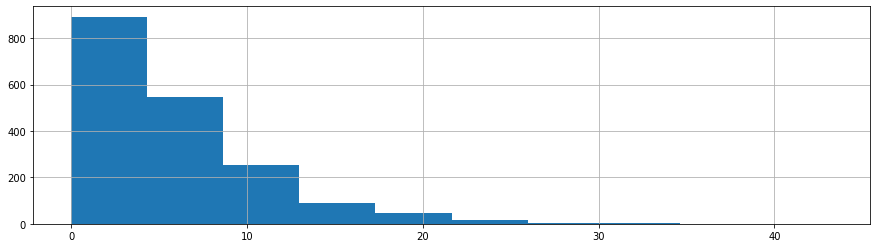

In [0]:
#Visualise error distribution
Result['APE'].hist(figsize = (15,4))

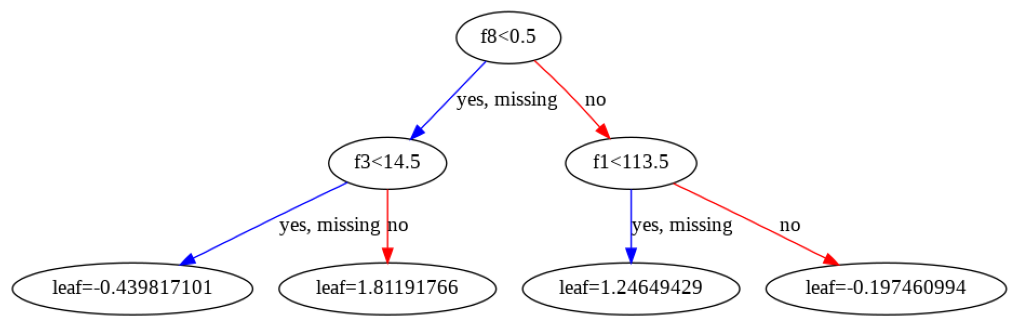

In [0]:
#Load Libraries
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,10))
plot_tree(XGBReg, num_trees=500, ax=ax)
plt.show()